In [8]:
library(systemfit)
library(stargazer)
library(dynlm)

Warning message:
"package 'dynlm' was built under R version 4.2.2"


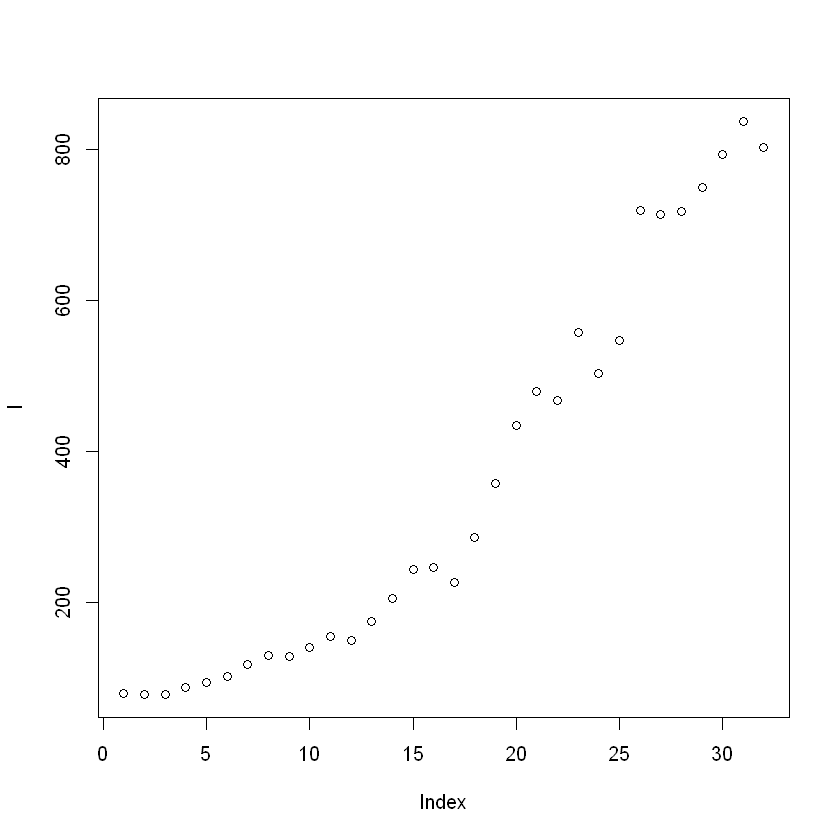

In [5]:
ch10bt14<-read.table('ch10bt14.txt',header=TRUE)
ch10bt14<-ts(ch10bt14,start(1959,1),frequency=1)
ch10bt14<-as.data.frame(ch10bt14)
I<-ch10bt14$I
plot(I)
R<-ch10bt14$R
M<-ch10bt14$M
Y<-ch10bt14$Y

In [20]:
reg1<-dynlm(ts(R)~ts(M)+L(ts(M),1)+ts(I))
summary(reg1)


Time series regression with "ts" data:
Start = 2, End = 32

Call:
dynlm(formula = ts(R) ~ ts(M) + L(ts(M), 1) + ts(I))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6521 -1.2500 -0.4302  0.9560  4.1936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.669155   0.672586   9.916  1.7e-10 ***
ts(M)       -0.027028   0.019736  -1.369    0.182    
L(ts(M), 1) -0.002934   0.018731  -0.157    0.877    
ts(I)        0.032101   0.005656   5.675  5.0e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.631 on 27 degrees of freedom
Multiple R-squared:  0.6992,	Adjusted R-squared:  0.6658 
F-statistic: 20.92 on 3 and 27 DF,  p-value: 3.268e-07


In [10]:
bhat1<-coef(reg1)
RHAT<-fitted.values(reg1)

In [21]:
reg2<-dynlm(ts(Y)~ts(M)+L(ts(M),1)+ts(I))
summary(reg2)


Time series regression with "ts" data:
Start = 2, End = 32

Call:
dynlm(formula = ts(Y) ~ ts(M) + L(ts(M), 1) + ts(I))

Residuals:
    Min      1Q  Median      3Q     Max 
-252.51  -41.57  -12.83   10.39  277.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -276.988     43.160  -6.418 7.09e-07 ***
ts(M)          1.493      1.266   1.179   0.2488    
L(ts(M), 1)    2.788      1.202   2.320   0.0282 *  
ts(I)          2.577      0.363   7.101 1.24e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 104.7 on 27 degrees of freedom
Multiple R-squared:  0.996,	Adjusted R-squared:  0.9956 
F-statistic:  2265 on 3 and 27 DF,  p-value: < 2.2e-16


In [12]:
YHAT<-fitted.values(reg2)
b<-cbind(YHAT,RHAT)
b

,YHAT,RHAT
1,505.6815,4.985371
2,508.4192,4.961126
3,525.6346,4.800177
4,561.5960,5.042877
5,598.4805,5.055866
6,648.6040,5.114484
7,720.4243,5.417079
8,768.6464,5.692458
9,810.4933,5.278636
10,900.0969,5.237715


In [13]:
stargazer(reg1,reg2,type='text')


                                  Dependent variable:     
                              ----------------------------
                                    R              Y      
                                   (1)            (2)     
----------------------------------------------------------
M                               -0.030***      4.260***   
                                 (0.006)        (0.446)   
                                                          
lag(M, 1)                                                 
                                                          
                                                          
I                                0.032***      2.446***   
                                 (0.005)        (0.378)   
                                                          
Constant                         6.636***     -283.511*** 
                                 (0.640)       (44.841)   
                                                       

In [ ]:
subsample<-ch10bt14[2:32,1:4]
subsample

In [18]:
reg3<-dynlm(ts(R)~ts(YHAT)+ts(M)+L(ts(M),1),data=subsample)
reg4<-dynlm(ts(R)~ts(YHAT)+ts(I),data=subsample)
stargazer(reg3,reg4,type='text')


                                 Dependent variable:             
                    ---------------------------------------------
                                        ts(R)                    
                             (1)                    (2)          
-----------------------------------------------------------------
ts(YHAT)                   0.016***              -0.004***       
                           (0.003)                (0.001)        
                                                                 
ts(M)                      -0.048*                               
                           (0.024)                               
                                                                 
L(ts(M), 1)                -0.059**                              
                           (0.021)                               
                                                                 
ts(I)                                             0.030***       
         

In [22]:
reg31<-dynlm(ts(R)~ts(Y)+ts(M)+L(ts(M),1)|ts(M)+ts(I)+L(ts(M),1))
reg41<-dynlm(ts(Y)~ts(R)+ts(I)|ts(M)+ts(I)+L(ts(M),1))
stargazer(reg31,reg41,type='text')


                                 Dependent variable:              
                    ----------------------------------------------
                            ts(R)                   ts(Y)         
                             (1)                     (2)          
------------------------------------------------------------------
ts(Y)                      0.012***                               
                           (0.002)                                
                                                                  
ts(M)                      -0.046**                               
                           (0.019)                                
                                                                  
L(ts(M), 1)                -0.038**                               
                           (0.016)                                
                                                                  
ts(R)                                            -143.300*** 

In [34]:
library(systemfit)
eq.Laisuat<-R~Y+M+lag(M,1)
eq.Thunhap<-Y~R+I
eq.system<-list(eq.Thunhap,eq.Laisuat)
instrum<- ~M+lag(M,1)+I

In [35]:
my.sys<-(systemfit(eq.system,inst=instrum,method="2SLS"))
my.sys

ERROR: Error in solve(crossprod(zMatEq[[i]]), crossprod(zMatEq[[i]], xMatAllThisEq), : the leading minor of order 3 is not positive definite


In [ ]:



summary(my.sys)